In [18]:
## 将TAD 合并为一个文件
import pandas as pd
tissues = ['anthers', 'cotyledon', 'hypocotyl', 'leaf', 'petal', 'root', 'stem', 'stigma']
df = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/number/{}_choosed.bed".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t")
    df_tmp['Tissue'] = [t]*df_tmp.shape[0]
    df = pd.concat([df, df_tmp], axis=0)
df.columns = ['Chrs', 'Start', 'End', 'Order', 'Tissue']
df['Size'] = (df['End'] - df['Start'])/1000
df = df.query("Size<=1000")
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/number/all_tissues_TAD.bed", sep="\t", index=False, columns=['Chrs', 'Start', 'End', 'Tissue'])

In [20]:
# 统计亚组中TAD 的数目
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/number/all_tissues_TAD.bed", sep="\t")
df['Subgenome'] = df['Chrs'].apply(lambda x: 'At' if "Ghir_A" in str(x) else "Dt")
df['Number'] = [1]*df.shape[0]
df_result = df.groupby(by=["Tissue", 'Subgenome'], as_index=False)['Number'].sum()
old_tissues = ['anthers', 'cotyledon', 'hypocotyl', 'leaf', 'petal', 'root', 'stem', 'stigma']
new_tissues = ['Anther', 'Cotyledon', 'Hypocotyl', 'Leaf', 'Petal', 'Root', 'Stem', 'Stigma']
df_result['Tissue'].replace(old_tissues, new_tissues, inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/number/all_tissues_TAD_number.bed", sep="\t", index=False)

In [21]:
# 分析亚组TAD 的大小
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/number/all_tissues_TAD.bed", sep="\t")
df['Subgenome'] = df['Chrs'].apply(lambda x: 'At' if "Ghir_A" in str(x) else "Dt")
df['Size'] = (df['End'] - df['Start'])/1000
df['TAD'] = df['Chrs'].map(str) + "-" + df['Start'].map(str) + "-" + df['End'].map(str)
df = df.query("Size<=1000")
old_tissues = ['anthers', 'cotyledon', 'hypocotyl', 'leaf', 'petal', 'root', 'stem', 'stigma']
new_tissues = ['Anther', 'Cotyledon', 'Hypocotyl', 'Leaf', 'Petal', 'Root', 'Stem', 'Stigma']
df['Tissue'].replace(old_tissues, new_tissues, inplace=True)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/TAD_size/all_tissues_TAD_size.bed", sep="\t", index=False)

In [21]:
## 统计不同类型的TAD 数目
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'number', 'tags'])
df['sigs'] = df['number'].apply(lambda x: 'Structural TAD' if x==0 else ("Isolated TAD" if x==1 else "Enrich TAD"))
df['numbers'] = [1]*df.shape[0]
df_result = df.groupby(by=['tags', 'sigs'], as_index=False)['numbers'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type_number.csv", index=False)

In [19]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'number', 'tags'])
df['size'] = df['end'] - df['start']
df['type'] = df['number'].apply(lambda x: 'Structural TAD' if x==0 else ("Isolated TAD" if x==1 else "Enrich TAD"))
df.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type.csv', index=False)

In [23]:
## 将不同类型的TAD 区分开来
tissues = ['anther', 'cotyledon', 'hypocotyl', 'leaf', 'petal', 'root', 'stem', 'stigma', 'fiber_20DPA', 'fiber_10DPA', 'ovule', 'radicle']
types= ['Enrich TAD', 'Isolated TAD']
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type.csv")
for t in tissues:
    for ty in types:
        if ty == "Enrich TAD":
            z = "Erich_TAD"
        if ty == 'Isolated TAD':
            z = 'Isolated_TAD'
        output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/data/{0}_{1}.bed".format(t, z)
        df_tmp = df.query("tags==@t & type==@ty").copy()
        df_tmp.to_csv(output_f, sep="\t", columns=['chrom', 'start', 'end'], header=False, index=False)

In [12]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")
df_long = pd.melt(df, id_vars=['GeneId'])
df_long.columns = ['GeneId', 'tissues', 'TPM']
df_long.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv", index=False)

In [21]:
## 对于基因打上标签, 分析处于
import pandas as pd
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_gene['ex_tag'] = df_gene['TPM'].apply(lambda x: "EXP" if x>=0.5 else "NoEXP")
df_tad_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissues', 'TAD_tag'])
df_gene = df_gene[['GeneId', 'tissues', 'ex_tag']].copy()
df_tad_gene = df_tad_gene[['GeneId', 'tissues', 'TAD_tag']]
df_tad_gene.drop_duplicates(keep='first', subset=['GeneId', 'tissues'])
df_result = pd.merge(df_gene, df_tad_gene, how='inner', on=['GeneId', 'tissues'])
df_result['number'] = [1]*df_result.shape[0]
df_return = df_result.groupby(by=['tissues', 'ex_tag', 'TAD_tag'], as_index=False)['number'].sum()
print(df_return)

      tissues ex_tag   TAD_tag  number
0      anther    EXP     Erich   38889
1      anther    EXP  Isolated     331
2      anther  NoEXP     Erich   28585
3      anther  NoEXP  Isolated     360
4   cotyledon    EXP     Erich   41951
5   cotyledon    EXP  Isolated     302
6   cotyledon  NoEXP     Erich   25584
7   cotyledon  NoEXP  Isolated     302
8   hypocotyl    EXP     Erich   45596
9   hypocotyl    EXP  Isolated     331
10  hypocotyl  NoEXP     Erich   22145
11  hypocotyl  NoEXP  Isolated     278
12       leaf    EXP     Erich   44135
13       leaf    EXP  Isolated     297
14       leaf  NoEXP     Erich   23340
15       leaf  NoEXP  Isolated     318
16       root    EXP     Erich   46018
17       root    EXP  Isolated     317
18       root  NoEXP     Erich   21394
19       root  NoEXP  Isolated     282
20     stigma    EXP     Erich   40689
21     stigma    EXP  Isolated     322
22     stigma  NoEXP     Erich   26795
23     stigma  NoEXP  Isolated     343


In [32]:
## 分析组织特异性表达基因是否会偏向分布于Isolated TAD 中
import pandas as pd
df_tad_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissues', 'TAD_tag'])
df_tad_gene = df_tad_gene[['GeneId', 'tissues', 'TAD_tag']]
df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_Tissue_TAU_geneid.csv")
#df_TSG = df_TSG[['GeneId']].copy()
df_TSG.drop_duplicates(keep='first', inplace=True, subset=['GeneId'])
df_TSG['tags'] = ['TSG']*df_TSG.shape[0]
df_result = pd.merge(df_tad_gene, df_TSG, how='inner', on=['GeneId', 'tissues'])
df_result['number'] = [1]*df_result.shape[0]
print(df_result)
df_return = df_result.groupby(by=['tissues', 'TAD_tag', 'tags'], as_index=False)['number'].sum()
print(df_return)
#print(df_gene)

               GeneId tissues   TAD_tag tags  number
0     Ghir_A01G000240  anther     Erich  TSG       1
1     Ghir_A01G000290  anther     Erich  TSG       1
2     Ghir_A01G000320  anther     Erich  TSG       1
3     Ghir_A01G000350  anther     Erich  TSG       1
4     Ghir_A01G000470  anther     Erich  TSG       1
...               ...     ...       ...  ...     ...
7814  Ghir_D13G025630  stigma     Erich  TSG       1
7815  Ghir_A02G008660  stigma  Isolated  TSG       1
7816  Ghir_A03G012990  stigma  Isolated  TSG       1
7817  Ghir_A10G016630  stigma  Isolated  TSG       1
7818  Ghir_D02G012910  stigma  Isolated  TSG       1

[7819 rows x 5 columns]
      tissues   TAD_tag tags  number
0      anther     Erich  TSG    2873
1      anther  Isolated  TSG      37
2   cotyledon     Erich  TSG     828
3   cotyledon  Isolated  TSG       8
4   hypocotyl     Erich  TSG     682
5   hypocotyl  Isolated  TSG       4
6        leaf     Erich  TSG     906
7        leaf  Isolated  TSG       8
8     

In [31]:
import pandas as pd
df_tad_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissues', 'TAD_tag'])
df_tad_gene = df_tad_gene[['GeneId', 'tissues', 'TAD_tag']]
df_tad_gene['number'] = [1]*df_tad_gene.shape[0]
df_result = df_tad_gene.groupby(by=['tissues', 'TAD_tag'], as_index=False)['number'].sum()
print(df_result)

      tissues   TAD_tag  number
0      anther     Erich   67474
1      anther  Isolated     691
2   cotyledon     Erich   67535
3   cotyledon  Isolated     604
4   hypocotyl     Erich   67741
5   hypocotyl  Isolated     609
6        leaf     Erich   67475
7        leaf  Isolated     615
8        root     Erich   67412
9        root  Isolated     599
10     stigma     Erich   67484
11     stigma  Isolated     665


In [34]:
## 分析Isolated gene 是否具备有更高的组织特异化程度
import pandas as pd
df_tad_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD/type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissues', 'TAD_tag'])
df_tad_gene = df_tad_gene[['GeneId', 'tissues', 'TAD_tag']]

df_tau = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")

df_tau = df_tau[['GeneId', 'TAU']].copy()
df_result = pd.merge(df_tad_gene, df_tau, how='inner', on=['GeneId'])



                 GeneId    tissues TAD_tag       TAU
0       Ghir_A01G000010     anther   Erich  0.730716
1       Ghir_A01G000010  cotyledon   Erich  0.730716
2       Ghir_A01G000010  hypocotyl   Erich  0.730716
3       Ghir_A01G000010       leaf   Erich  0.730716
4       Ghir_A01G000010       root   Erich  0.730716
...                 ...        ...     ...       ...
408899  Ghir_D13G007790       root   Erich  0.850958
408900  Ghir_D13G007800       root   Erich  0.836236
408901  Ghir_D13G007810       root   Erich  0.999919
408902  Ghir_D13G007820       root   Erich  0.448970
408903  Ghir_D06G011040     stigma   Erich  0.247399

[408904 rows x 4 columns]


<AxesSubplot:xlabel='tissues', ylabel='TAU'>

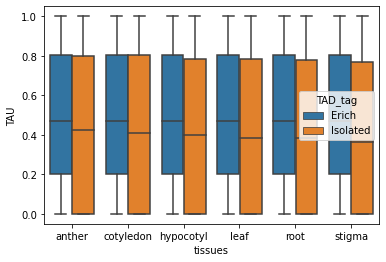

In [39]:
import seaborn as sns
sns.boxplot(x=df_result['tissues'], y=df_result['TAU'], hue=df_result['TAD_tag'])

In [11]:
# 筛选突变体库中的基因是否有位于孤岛基因 (孙梦玲)
import pandas as pd
df_type_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissue', 'tags'])
df_Isolate_geneid = df_type_gene.query("tags=='Isolated'")[['GeneId']]
df_Isolate_geneid.drop_duplicates(keep='first', inplace=True)
df_mutate = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/mutants/Mutate_gene.txt", sep="\t")
df_result = pd.merge(df_Isolate_geneid, df_mutate, how='inner', on=['GeneId'])
df_geneid = df_result[['GeneId']].copy()
df_gene_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")
df_result= pd.merge(df_geneid, df_gene_TPM, how='left', on=['GeneId'])
df_result.to_excel("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/mutate/SML_mutate_isolation_TAD.xls", index=False)


C:\Users\pc\AppData\Local\Temp\ipykernel_29592\4185820667.py:11: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_result.to_excel("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/mutate/SML_mutate_isolation_TAD.xls", index=False)


In [4]:
## 筛选突变体库中是否有孤岛基因 (张肖)
import pandas as pd
df_type_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissue', 'tags'])
df_Isolate_geneid = df_type_gene.query("tags=='Isolated'")[['GeneId']]
df_Isolate_geneid.drop_duplicates(keep='first', inplace=True)
df_mutate = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/mutants/zhangxiao_TF.csv")
df_mutate_id = df_mutate[['GeneId']].copy()
df_result = pd.merge(df_Isolate_geneid, df_mutate_id, how='inner', on=['GeneId'])
df_gene_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")
df_result = pd.merge(df_result, df_gene_TPM, how='inner', on=['GeneId'])
print(df_result)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/mutate/zhangxiao_mutate_islation_TAD.csv", index=False)

            GeneId     anther      ovule       root    radicle       leaf  \
0  Ghir_A03G011140   0.799356  29.210959   2.568919  10.288888   6.496146   
1  Ghir_A08G010820   0.513364  12.432453   0.726312   0.407916   2.900222   
2  Ghir_A11G021210   9.987258   5.531542  45.103682  13.422412  12.830680   
3  Ghir_A12G007670  18.389610  13.351511   3.523124   0.823820  65.902990   
4  Ghir_D11G019890   0.010051   0.000000   0.000000   0.013704   0.028747   
5  Ghir_D11G023270   3.149479   2.403123  46.567595  11.965083  11.037861   
6  Ghir_A02G011470  12.342137   8.668066   9.072853   8.614013   4.424294   
7  Ghir_A08G008890   0.018365  14.070554   4.155479   1.869885   2.081487   

   hypocotyl  cotyledon       stem  fiber_10DPA  fiber_20DPA      petal  \
0  88.615934   5.616829  39.395852     4.118404     3.789097   5.334714   
1   2.526649   4.777033   2.173620    22.874353     8.499842   7.479017   
2  25.511529  11.533034  28.264296     1.789693     1.662166  64.803886   
3  17.

In [36]:
# 分析不同类型TAD所包含基因其在不同组织中可表达的分布
import pandas as pd
df_type_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissue', 'tags'])
#df_hypocotyl = df_type_gene.query("tissue=='hypocotyl'")[['GeneId', 'tags']].copy()
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv", index_col=0)
df_gene[df_gene>=0.5] = 1
df_gene[df_gene<0.5] = 0
df_gene['sum'] = df_gene.sum(axis=1)
df_gene['number'] = [1]*df_gene.shape[0]
df_gene.reset_index(inplace=True)
df_allTissues_gene = pd.merge(df_type_gene, df_gene, how='left', on=['GeneId'])
df_allTissues_statistics = df_allTissues_gene.groupby(by=['tissue', 'tags', 'sum'], as_index=False)['number'].sum()
df_allTissues_statistics['sigs'] = df_allTissues_statistics['sum'].apply(lambda x: "Silence gene" if x==0 else ("Housekeeping gene" if x==12 else "Other gene"))
df_result = df_allTissues_statistics.groupby(by=['tissue', 'tags', 'sigs'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_allTissue_TEG_statistics.csv", index=False)

In [2]:
# 确定组织功能性TAD区间
import pandas as pd
import numpy as np
def TAD_region(df):
    df[['chrom', 'start', 'end']] = df['tad_tags'].str.split("-", expand =True)
    df_return = df[['chrom', 'start', 'end']].copy()
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return
tissues = ['anther', 'cotyledon', 'hypocotyl', 'leaf', 'petal', 'root', 'stem', 'stigma', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/{}_TAD_TSG_number.csv".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TSG_TAD_region/{}_TAD_TSG_region.bed".format(t)
    df_tmp = pd.read_csv(input_f)
    df_True = df_tmp[df_tmp['signif_tags']].copy()
    df_result = TAD_region(df_True)
    df_result.to_csv(output_f, sep="\t", index=False, header=False)

In [ ]:
## Nutures
## 20221123
## 分析所包含的矩阵互作

import pandas as pd
import sys
import argparse
def main(argv):
    parser = argparse.ArgumentParser(description="")
    parser.add_argument('-tad', "--TADfile", required=True, help="TAD indefified by TADLib")
    parser.add_argument('-mtx', "--matrixfile", required=True, help="Intrachromosomal interaction matrix file generated by HiC-Pro")
    parser.add_argument('-bed', "--bedfile", required=True, help="Bedfile of Intrachromosomal interaction matrix")
    parser.add_argument('-gene', "--genefile", required=True, help="The bin file contain gene")
    parser.add_argument('-o', "--outputfile1", required=True, help="output file that intra-TAD interaction strength")
    args = parser.parse_args()
    tad_f = args.TADfile
    mtx_f = args.matrixfile
    bed_f = args.bedfile
    gene_f = args.genefile
    out_f = args.outputfile
    df_tad = pd.read_csv(tad_f, sep='\t', names=['chr', 's', 'e'])
    df_mtx = pd.read_csv(mtx_f, sep='\t', names=['bin1', 'bin2', 'freq'])
    df_bed = pd.read_csv(bed_f, sep='\t', names=['chr', 's', 'e', 'bin_id'])
    df_gene = pd.read_csv(gene_f, sep="\t", names=['chr', 's', 'e', 'GeneId'])
    ## get TAD bin interaction
    df_TAD_interaction = pd.DataFrame()
    for index, row in df_tad.iterrows():
        c, s, e= row['chr'], row['s'], row['e']
        tags = "{0}-{1}-{2}".format(c, s, e)
        df_bin_id = df_bed.query("(chr == @c) & (s>=@s) & (e<=@e)").copy()
        df_bin_id.reset_index(drop=True, inplace=True)
        bin_id_s = df_bin_id.loc[0, 'bin_id']
        bin_id_e = df_bin_id.loc[df_bin_id.shape[0]-1, 'bin_id']
        df_need_matrix = df_mtx.query("(bin1>=@bin_id_s & bin1<=@bin_id_e) & (bin2>=@bin_id_s & bin2<=@bin_id_e)").copy()
        df_need_matrix['tags'] = [tags]*df_need_matrix.shape[0]
        df_TAD_interaction = pd.concat([df_TAD_interaction, df_need_matrix], axis=0)
    ##  get gene bin interaction 
    df_gene_bin = pd.merge(df_gene, df_bed, how='inner', on=['chr', 's', 'e'])[['bin_id']].copy()
    df_gene_bin.columns = ['bin1']
    df_gene_bin_interaction1 = pd.merge(df_gene_bin, df_TAD_interaction, how='inner', on=['bin1'])
    df_gene_bin.columns = ['bin2']
    df_gene_bin_interaction2 = pd.merge(df_gene_bin, df_TAD_interaction, how='inner', on=['bin2'])
    df_gene_bin_interaction = pd.concat([df_gene_bin_interaction1, df_gene_bin_interaction2], axis=0)
    df_gene_bin_interaction.drop_duplicates(keep='first', on=['GeneId'], inplace=True)
    
    ## analysis the gene bin interaction 
    df_gene = df_gene_bin_interaction.groupby(by=['tags'], as_index=False)['freq'].mean()
    df_TAD = df_TAD_interaction.groupby(by=['tags'], as_index=False)['freq'].mean()
    df_gene.columns = ['tags', 'gene_mean_reads']
    df_TAD.columns = ['tags', 'tad_mean_reads']
    df_result = pd.merge(df_gene, df_TAD, how='inner', on=['tags'])
    df_result['ratio'] = df_result['gene_mean_reads']/df_result['tad_mean_reads']
    df_result.to_csv(out_f, sep="\t", index=False)


if __name__ == '__main__':
    main(sys.argv[1:])

In [1]:

import pandas as pd
tissues = ['anther', 'leaf', 'root', 'stem', 'stigma', 'cotyledon', 'hypocotyl', 'petal', 'fiber_10DPA', 'radicle', 'fiber_20DPA', 'ovule']
df = pd.DataFrame()
for t in tissues:
    inputf = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/{}_TAD_TSG_number.csv".format(t)
    outputf = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/{}_TAD_TSG.csv".format(t)
    df_tmp = pd.read_csv(inputf)
    #print(df_tmp.shape[0])
    df_tmp = df_tmp[df_tmp['signif_tags']]
    df_tmp.drop_duplicates(keep='first', subset=['tad_tags'], inplace=True)
    df_tmp[['chrom', 'start', 'end']] = df_tmp['tad_tags'].str.split("-", expand = True)
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    df_tmp.to_csv(outputf, columns=['chrom', 'start', 'end'], index=False)
    df = pd.concat([df, df_tmp], axis=0)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/J668_TSG_TAD.bed", sep="\t", index=False, header=False, columns=['chrom', 'start', 'end', 'tissues'])
    #

In [2]:
## 分析组织特异性基因其subcompartment占比是否会有显著性差异
import pandas as pd
def get_subcompartment_region(df_TAD, df_subcpt, tags1, tags2):
    df_TAD_subcpt = pd.DataFrame()
    for index, row in df_TAD.iterrows():
        C, S, E,  = row['chrom'], row['start'], row['end']
        T = "{0}-{1}-{2}".format(C, S, E)
        df_tmp = df_subcpt.query("chrom==@C & start<=@E & end>=@S").copy()
        df_tmp['tad_tags'] = [T]*df_tmp.shape[0]
        df_TAD_subcpt = pd.concat([df_TAD_subcpt, df_tmp], axis=0)
    df_TAD_subcpt['number'] = [1]*df_TAD_subcpt.shape[0]
    df_TAD_subcpt['tags1'] = [tags1]*df_TAD_subcpt.shape[0]
    df_TAD_subcpt['tags2'] = [tags2]*df_TAD_subcpt.shape[0]
    return df_TAD_subcpt
tissues = ['anther', 'leaf', 'root', 'stem', 'stigma', 'cotyledon', 'hypocotyl', 'petal', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'radicle']
df_result = pd.DataFrame()
for t1 in tissues:
    tad_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/{}_TAD_TSG.csv".format(t1)
    df_TAD = pd.read_csv(tad_f)
    for t2 in tissues:
        subcpt_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/CALDER2/subcompartment/{}_subcompartment_new.bed".format(t2)
        df_subcpt = pd.read_csv(subcpt_f, sep="\t", names=['chrom', 'start', 'end', 'value', 'subcpt', 'cpt'])
        df_subcpt = get_subcompartment_region(df_TAD, df_subcpt, t1, t2)
        df_result = pd.concat([df_result, df_subcpt], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt.csv", index=False)


In [10]:
## 分析有多少TAD 是存在subcpt活性差异
import pandas as pd
tissues = ['anther', 'leaf', 'root', 'stem', 'stigma', 'cotyledon', 'hypocotyl', 'petal', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
old_tags = ['A1', 'A2', 'A3', 'A4', 'B4', 'B3', 'B2', 'B1']
new_tags = [8, 7, 6, 5, 4, 3, 2, 1]
#old_tags = ['A', 'B']
#new_tags = [2, 1]
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt.csv")
df['subcpt'].replace(old_tags, new_tags, inplace=True)
df_result = pd.DataFrame()
for t1 in tissues:
    df_t = pd.DataFrame()
    for t2 in tissues:
        df_tmp = df.query("tags1==@t1 & tags2==@t2")[['chrom', 'start', 'end', 'subcpt', 'tad_tags', 'tags1']].copy()
        df_tmp.columns = ['chrom', 'start', 'end', t2, 'tad_tags', 'tags']
        if df_t.shape[0] == 0:
            df_t = df_tmp.copy()
        else:
            df_t = pd.merge(df_t, df_tmp, how='inner', on=['chrom', 'start', 'end', 'tad_tags', 'tags'])
    df_result = pd.concat([df_result, df_t], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_wide.csv", index=False)

## 统计分析活性TAD 差异
def bias_TAD(df, tags):
    #print(df)
    df['number'] = [1]*df.shape[0]
    df_active = df[df[tags]>0]
    df_deactive = df[df[tags]<0]
    #print(df_active)
    df_active = df_active.groupby(by=['tad_tags'], as_index=False)['number'].sum()
    df_deactive = df_deactive.groupby(by=['tad_tags'], as_index=False)['number'].sum()
    df = df.groupby(by=['tad_tags'], as_index=False)['number'].sum()
    
    df.columns = ['tad_tags', 'total_number']
    df_active.columns = ['tad_tags', 'active_number']
    df_deactive.columns = ['tad_tags', 'deactive_number']
    df_activate = pd.merge(df, df_active, how='left', on=['tad_tags'])
    df_deactivate = pd.merge(df, df_deactive, how='left', on=['tad_tags'])
    
    df_activate.fillna(0, inplace=True)
    df_deactivate.fillna(0, inplace=True)
    
    df_activate['activate_ratio'] = df_activate['active_number']/df_activate['total_number']
    df_deactivate['deactivate_ratio'] = df_deactivate['deactive_number']/df_deactivate['total_number']
    df_return = pd.merge(df_activate, df_deactivate, how='inner', on=['tad_tags', 'total_number'])
    df_return['ratio'] = (df_return['activate_ratio']+1)/(df_return['deactivate_ratio']+1)
    #df_return.columns = ['tad_tags', tags]
    print(df_return.query("ratio>1").shape[0], df_return.query("ratio<1").shape[0])
    return df_return
def statistic_biasTAD(df, tags):
    tissues = ['anther', 'leaf', 'root', 'stem', 'stigma', 'cotyledon', 'hypocotyl', 'petal', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
    df_return = pd.DataFrame()
    for t in tissues:
        if t != tags:
            print(tags, t)
            tad_vs_tad = "{0}-VS-{1}".format(tags, t)
            df[tad_vs_tad] = df[tags] - df[t]
            df_tmp = df[['tad_tags', tad_vs_tad]].copy()
            df_tmp = bias_TAD(df_tmp, tad_vs_tad)
            df_tmp['tags1'] = [tags]*df_tmp.shape[0]
            df_tmp['tags2'] = [t]*df_tmp.shape[0]
            if df_return.shape[0]==0:
                df_return = df_tmp.copy()
            else:
                df_return = pd.concat([df_return, df_tmp], axis=0)
    return df_return
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_wide.csv")
df_result = pd.DataFrame()
for t in tissues:
    df_t = df.query("tags==@t").copy()
    #print(df_t.drop_duplicates(keep='first', subset=['tad_tags']).shape[0])
    df_tmp = statistic_biasTAD(df_t, t)
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_activate_deactivate_ratio.csv", index=False)

## 对上述结果进行统计
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_activate_deactivate_ratio.csv")
df['tags'] = df['ratio'].apply(lambda x: 'deactive' if x>1 else ('active' if x<1 else 'stable'))  ## a TAD 区间相比与b 来说变得不活跃了设定为deactivate 如果是变得活跃了设定为activate
df['number'] = [1]*df.shape[0]
df_result = df.groupby(by=[ 'tags1', 'tags2', 'tags'], as_index=False)['number'].sum()


df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_activate_deactivate_ratio_statistics.csv", index=False)

anther leaf
158 67
anther root
151 84
anther stem
164 67
anther stigma
150 67
anther cotyledon
151 68
anther hypocotyl
139 84
anther petal
112 98
anther fiber_10DPA
168 64
anther fiber_20DPA
182 49
anther ovule
169 72
anther radicle
91 135
leaf anther
57 47
leaf root
62 33
leaf stem
76 29
leaf stigma
63 38
leaf cotyledon
63 33
leaf hypocotyl
57 48
leaf petal
46 46
leaf fiber_10DPA
70 37
leaf fiber_20DPA
77 27
leaf ovule
87 27
leaf radicle
53 52
root anther
133 92
root leaf
172 53
root stem
164 54
root stigma
157 64
root cotyledon
134 96
root hypocotyl
124 86
root petal
148 82
root fiber_10DPA
147 69
root fiber_20DPA
166 58
root ovule
184 47
root radicle
88 132
stem anther
32 48
stem leaf
51 31
stem root
37 43
stem stigma
38 36
stem cotyledon
43 38
stem hypocotyl
20 49
stem petal
33 44
stem fiber_10DPA
33 42
stem fiber_20DPA
46 34
stem ovule
58 34
stem radicle
23 52
stigma anther
30 27
stigma leaf
38 24
stigma root
38 25
stigma stem
44 20
stigma cotyledon
40 25
stigma hypocotyl
35 29
st

In [14]:
## 整理TAD 包含的subcompartment的变化
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_activate_deactivate_ratio.csv")
df['tags'] = df['ratio'].apply(lambda x: 'deactive' if x>1 else ('active' if x<1 else 'bstable')) ## >1 值对照组的活性高，实验组中变得不活跃
## 数据调整为宽数据格式
df_wide = pd.pivot(df, index=['tad_tags', 'tags1'], columns='tags2', values='tags')
df_wide.reset_index(inplace=True)
df_wide.fillna('bstable', inplace=True)
## anther
df_wide_anther = df_wide.query("tags1=='anther'").copy()
print(df_wide_anther)
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_wide_anther = df_wide_anther.sort_values(by=tissues)
df_wide_anther['x_lab'] = range(df_wide_anther.shape[0])
df_anther_long = pd.melt(df_wide_anther, id_vars=['x_lab', 'tags1', 'tad_tags'])
df_anther_long.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/anther_TSG_TAD_subcpt.csv", index=False)

# radicle
# df_wide_anther = df_wide.query("tags1=='radicle'").copy()
# print(df_wide_anther)
# tissues = ['radicle', 'anther', 'ovule', 'root',  'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
# df_wide_anther = df_wide_anther.sort_values(by=tissues)
# df_wide_anther['x_lab'] = range(df_wide_anther.shape[0])
# df_anther_long = pd.melt(df_wide_anther, id_vars=['x_lab', 'tags1', 'tad_tags'])
# df_anther_long.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/radicle_TSG_TAD_subcpt.csv", index=False)

tags2                      tad_tags   tags1   anther cotyledon fiber_10DPA  \
5      Ghir_A01-104980000-105320000  anther  bstable  deactive    deactive   
31       Ghir_A01-14940000-15240000  anther  bstable   bstable     bstable   
42       Ghir_A01-23680000-23880000  anther  bstable  deactive    deactive   
69       Ghir_A01-59180000-59460000  anther  bstable  deactive    deactive   
75       Ghir_A01-69920000-71000000  anther  bstable   bstable     bstable   
...                             ...     ...      ...       ...         ...   
2532     Ghir_D13-40100000-40300000  anther  bstable  deactive    deactive   
2547     Ghir_D13-50040000-50300000  anther  bstable   bstable     bstable   
2557     Ghir_D13-55440000-55660000  anther  bstable   bstable     bstable   
2564     Ghir_D13-58060000-58380000  anther  bstable   bstable     bstable   
2572     Ghir_D13-60900000-61340000  anther  bstable   bstable     bstable   

tags2 fiber_20DPA hypocotyl      leaf     ovule     petal   rad

In [53]:
### 将所有大于比例大于1.5的TAD 选出来
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_activate_deactivate_ratio.csv")
df_choose = df.query("ratio>=1.5").copy()
df_choose.drop_duplicates(keep='first', subset=['tad_tags'], inplace=True)
df_choose[['chr', 'start', 'end']] = df_choose['tad_tags'].str.split("-", expand=True)
df_choose.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/example/TSG_TAD_subcpt.bed", sep="\t", index=False, header=False, columns=['chr', 'start', 'end', 'tags1'])

In [18]:
import pandas as pd
df =  pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_wide.csv")
df['number'] = [1]*df.shape[0]
df.drop_duplicates(keep='first', subset=['tad_tags', 'tags'], inplace=True)
df_tmp = df.groupby(by=['tags'], as_index=False)['number'].sum()
print(df_tmp)

        tags  number
0     anther     307
1  cotyledon     154
2  hypocotyl     165
3       leaf     154
4      petal      53
5       root     327
6       stem     127
7     stigma      91


In [ ]:
## 拉取包含基因的bin
import pandas as pd
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/all_gene_bin_10Kb.bed", sep="\t", names=['chrom', 'start', 'end'])
df_subcpt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt.csv")
df_gene['start'] = df_gene['start']+1
df_gene['end'] = df_gene['end']
print(df_gene)
df_result = pd.merge(df_subcpt, df_gene, how='inner', on=['chrom', 'start', 'end'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_gene_TAD_subcpt.csv", index=False)

In [36]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_gene_TAD_subcpt.csv")
df_result = df.groupby(by=['cpt', 'tags1', 'tags2'], as_index=False)['number'].sum()
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_gene_TAD_subcpt_statistics.csv', index=False)

In [42]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt.csv")
df_result = df.groupby(by=['cpt', 'tags1', 'tags2'], as_index=False)['number'].sum()
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/TSG_TAD_subcpt_statistics.csv', index=False)

In [41]:
import pandas as pd
tissues = ['anther', 'cotyledon', 'hypocotyl','leaf', 'petal', 'root', 'stem', 'stigma']
## 分析转换区间所能包含的
for t2 in tissues:
    subcpt_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/CALDER2/subcompartment/{}_subcompartment_new.bed".format(t2)
    df = pd.read_csv(subcpt_f, sep="\t",names=['chrom', 'start', 'end', 'value', 'subcpt', 'cpt'])
    df_a = df.query("cpt=='A'").copy()
    df_b = df.query("cpt=='B'").copy()
    print(df_b.shape[0])

94288
98738
94350
98774
106790
95032
108520
112332


In [25]:
## 分析TSG 所包含的subcompartment
import pandas as pd
df_anther_TSG_TAD = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/anther_TAD_TSG.csv")
df_dynamic_subcpt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/compartment/CALDER2/subcompartment/J668_tissues_subcpt_wide.bed", sep="\t")
df_TSG_TAD_subcpt = pd.DataFrame() 
## 将所有位于TSG_TAD的动态subcpt都选出来
for index, row in df_anther_TSG_TAD.iterrows():
    C, S, E = row['chrom'], row['start'], row['end']
    df_tmp = df_dynamic_subcpt.query("chr==@C & start<= @E & end>=@S").copy()
    df_TSG_TAD_subcpt = pd.concat([df_TSG_TAD_subcpt, df_tmp], axis=0)
## 将结果整理为ggplot可识别格式
#df_TSG_TAD_subcpt_A02 = df_TSG_TAD_subcpt.query("chr.str.contains('A01')", engine='python').copy()
df_TSG_TAD_subcpt_A02 = df_TSG_TAD_subcpt.copy()
#print(df_TSG_TAD_subcpt_A02)
# 排序
list_sorted = ['A1', 'A2', 'A3', 'A4', 'B4', 'B3', 'B2', 'B1']
df_TSG_TAD_subcpt_A02['anthers'] = df_TSG_TAD_subcpt_A02['anthers'].astype('category').cat.set_categories(list_sorted)
#df_TSG_TAD_subcpt_A02['ovules'] = df_TSG_TAD_subcpt_A02['ovules'].astype('category').cat.set_categories(list_sorted)
#df_TSG_TAD_subcpt_A02['root'] = df_TSG_TAD_subcpt_A02['root'].astype('category').cat.set_categories(list_sorted)

df_TSG_TAD_subcpt_A02 = df_TSG_TAD_subcpt_A02.sort_values(by=['anthers'], ascending=True)
df_TSG_TAD_subcpt_A02['x_lab'] = range(df_TSG_TAD_subcpt_A02.shape[0])
#df_tmp = df_TSG_TAD_subcpt_A02[['x_lab', ]]
df_long = pd.melt(df_TSG_TAD_subcpt_A02, id_vars=['x_lab', 'chr', 'start', 'end'])
df_long.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_subcpt/anther_TSG_TAD_subcpt.csv", index=False)


In [39]:
## 选出所有的孤岛基因
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissue', 'type'])
tissues = ['anther', 'cotyledon', 'hypocotyl','leaf', 'petal', 'root', 'stem', 'stigma', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
for t in tissues:
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/{}_isolated_gene.bed".format(t)
    df_tmp = df.query("tissue==@t & type=='Isolated'")[['GeneId']].copy()
    df_tmp.to_csv(output_f, index=False, header=False)

In [40]:
## 分析孤岛TAD 中所包含的同源基因，分析其是否具有明显差异
## 1、确定同源基因对的孤岛TAD
import pandas as pd
def isolated_Hg_gene(df_tissues_isolated_gene):
    df_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/Ghir_homo_gene_pairs.txt", sep="\t")
    df_Isolate_geneid = df_tissues_isolated_gene.copy()
    df_Isolate_geneid['tags'] = ['Isolated']*df_Isolate_geneid.shape[0]
    df_Isolate_geneid.columns = ['GeneId_At', 'At_tags']
    df_a = pd.merge(df_hg, df_Isolate_geneid, how='left', on=['GeneId_At'])
    df_Isolate_geneid.columns = ['GeneId_Dt', 'Dt_tags']
    df_ad = pd.merge(df_a, df_Isolate_geneid, how='left', on=['GeneId_Dt'])
    df_return = df_ad.query("At_tags=='Isolated' | Dt_tags=='Isolated'").copy()
    df_return.fillna("NIsolated", inplace=True)
    return df_return
def ITADHG_bias(df_ITADHG, T):
    df_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
    df_bias_tag = df_bias.query("tags==@T")[['GeneId_At', 'GeneId_Dt', 'sig']].copy()
    df_return = pd.merge(df_ITADHG, df_bias_tag, how='left', on=['GeneId_At', 'GeneId_Dt'])
    df_return.fillna("BiasN", inplace=True)
    return df_return
    
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma', 'ovule']
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/{}_isolated_gene.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/{}_isolated_Hg.csv".format(t)
    df_Isolated_gene = pd.read_csv(input_f, names=['geneid'])
    df_Isolated_HG = isolated_Hg_gene(df_Isolated_gene) ## 分析确定同源孤岛基因
    df_Isolated_HG_bias = ITADHG_bias(df_Isolated_HG, t) ## 确定同源基因对之间是否发生了bias
    df_Isolated_HG_bias.to_csv(output_f, index=False)

## 2、分析孤岛同源基因对间的差异


In [58]:
## 统计分析各组织间动态孤岛基因数目
import pandas as pd
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/{}_isolated_gene.bed".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t", names=['GeneId'])
    df_tmp[t] = [1]*df_tmp.shape[0]
    if df_result.shape[0] == 0:
        df_result = df_tmp.copy()
    else:
        df_result = pd.merge(df_result, df_tmp, how='outer', on=['GeneId'])
df_result.fillna(0 , inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/J668_isolated_TAD_gene.csv", index=False)
df_result['allsum'] = df_result[tissues].sum(axis=1)
print(df_result.shape[0])
df_stable = df_result.query("allsum==12").copy()
df_stable.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stable_ITAD_gene/J668_Multip_tissues_Stable_ITAD_gene.csv", index=False)
df_dynamic = df_result.query("allsum<12")[tissues].copy()
df_dynamic.reset_index(inplace=True, drop=True)
df_dynamic.reset_index(inplace=True)
df_dynamic.sort_values(by=tissues, inplace=True)
df_dynamic_long = pd.melt(df_dynamic, id_vars='index')
df_dynamic_long.columns = ['index', 'tissues', 'type']
print(df_dynamic_long.groupby(by=['tissues'],as_index=False)['type'].sum())
df_dynamic_long.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/J668_dynamic_isolated_TAD_gene.csv", index=False)


1621
        tissues   type
0        anther  516.0
1     cotyledon  429.0
2   fiber_10DPA  570.0
3   fiber_20DPA  599.0
4     hypocotyl  434.0
5          leaf  440.0
6         ovule  544.0
7         petal  506.0
8       radicle  475.0
9          root  424.0
10         stem  430.0
11       stigma  490.0


In [88]:
## 分析孤岛基因在各组织的两个亚基因组同源基因中的数目
import pandas as pd
df_enrich_isolated = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/data/gene_TAD_type.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissue', 'type'])
df_isolated = df_enrich_isolated.query("type=='Isolated'")[['GeneId', 'tissue', 'type']].copy()
df_isolated_At = df_isolated.query("GeneId.str.contains('Ghir_A')", engine='python').copy()
df_isolated_Dt = df_isolated.query("GeneId.str.contains('Ghir_D')", engine='python').copy()
#print(df_isolated_At.shape[0], df_isolated_Dt.shape[0])
df_hg_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")
###  Bias At
df_isolated_At.columns = ['GeneId_At', 'tissue', 'type_At']
df_isolated_At = pd.merge(df_hg_pair, df_isolated_At, how='inner', on=['GeneId_At'])
#print(df_isolated_At)
#print(df_isolated_At.shape[0])
### Bias Dt
df_isolated_Dt.columns = ['GeneId_Dt', 'tissue', 'type_Dt']
df_isolated_Dt = pd.merge(df_hg_pair, df_isolated_Dt, how='inner', on=['GeneId_Dt'])
df_isolated_AtDt = pd.merge(df_isolated_At, df_isolated_Dt, how='outer', on=['GeneId_At', 'GeneId_Dt', 'tissue'])
df_isolated_AtDt.fillna("NIsolated", inplace=True)
df_isolated_AtDt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/HG/J668_Isolated_TAD_HG_pair.csv", index=False)
df_isolated_AtDt['Tags'] = df_isolated_AtDt['type_At'].map(str) + "-" + df_isolated_AtDt['type_Dt'].map(str)
old_tags = ['Isolated-Isolated', 'Isolated-NIsolated', 'NIsolated-Isolated']
new_tags = ['AtIso-DtIso', 'AtIso-DtNIso', 'AtNIso-DtNIso']
df_isolated_AtDt['Tags'].replace(old_tags, new_tags, inplace=True)
df_isolated_AtDt['number'] = [1]*df_isolated_AtDt.shape[0]
df_statistics_result = df_isolated_AtDt.groupby(by=['tissue', 'Tags'], as_index=False)['number'].sum()
df_statistics_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/HG/J668_HIsoGene_statistics.csv", index=False)

In [16]:
## 根据所确定的孤岛基因来确定所有的孤岛TAD 结构
import pandas as pd
tissues = ['cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma', 'ovule']
df_anther = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/anther_isolated_gene.bed", names=['GeneId'])
df_tmp = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/{}_isolated_gene.bed".format(t)
    df_tissue = pd.read_csv(input_f, names=['GeneId'])
    if df_tmp.shape[0] == 0:
        df_tmp = pd.merge(df_anther, df_tissue, how='inner', on=['GeneId'])
    else:
        df_tmp = pd.merge(df_tmp, df_tissue, how='inner', on=['GeneId'])
df_tmp.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/J668_Multip_tissues_Stable_ITAD_gene.bed", index=False)

In [21]:
## 分析这些基因的TAU值的大小
import pandas as pd
df_stable = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/J668_Multip_tissues_Stable_ITAD_gene.bed")
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_tissue_TAU.csv")
df_TAU = df_TAU[['GeneId', 'TAU']].copy()
df = pd.merge(df_stable, df_TAU, how='inner', on=['GeneId'])
print(df.query("TAU>=0.85").shape[0])
df.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/Rawdata/J668_Multip_tissues_Stable_ITAD_gene_TAU.csv', index=False)

40


In [23]:
## 确定基因位置
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stable_ITAD_gene/J668_Multip_tissues_Stable_ITAD_gene.bed")
df_position = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_gene_position.bed", sep="\t")
df_result = pd.merge(df, df_position, how='inner', on=['GeneId'])
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stable_ITAD_gene/J668_Multip_tissues_Stable_ITAD_gene.bed', sep="\t", index=False)

In [8]:
## 将每个组织TAD分为五等份
import pandas as pd

## 每个TAD划分五等份
def TAD_Quintiles(df):
    df['TAD_size'] = df['end'] - df['start']
    df['length'] = df['TAD_size']/5
    tags = ['one', 'two', 'three', 'four', 'five']
    df_return = ['df1', 'df2', 'df3', 'df4', 'df5']
    for i in range(5):
        df[tags[i]] = df['start'] + df['length']*(i+1)
        df[tags[i]] = df[tags[i]].map(int)
        if i==0:
            df_return[i] = df[['chrom', 'start', tags[i]]].copy()
        else:
            df_return[i] = df[['chrom', tags[i-1], tags[i]]].copy()
    return df_return
## 数据格式标准化
def data_format(input_f):
    df = pd.read_csv(input_f, sep="\t")
    df.columns = ['chrom', 'start', 'end', 'order']
    df_return = df[['chrom', 'start', 'end']].copy()
    return df_return

tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma']
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{0}_choosed.bed".format(t)
    df = data_format(input_f)
    df_TAD_quintiles = TAD_Quintiles(df)
    # 输出文件
    for i in range(5):
        output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/{0}_TAD{1}.bed".format(t, i)
        df_TAD_quintiles[i].to_csv(output_f, sep="\t", index=False, header=False)


In [10]:
## 分析确定五等份TAD所包含的基因表达量
import pandas 
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma']
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_result = pd.DataFrame()
for t in tissues:
    df_tissues_gene = df_gene.query("tissues==@t").copy()
    TAD_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/{}_TAD_quintiles_gene.bed".format(t)
    df_TAD = pd.read_csv(TAD_f, sep="\t", names=['GeneId', 'level'])
    df_tissues_tmp = pd.merge(df_TAD, df_tissues_gene, how='left', on=['GeneId'])
    df_result = pd.concat([df_result, df_tissues_tmp], axis=0)
old_level = [0, 1, 2, 3, 4]
new_level = ['one', 'two', 'three', 'four', 'five']
df_result['level'].replace(old_level, new_level, inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/J668_TAD_quintiles_gene_TPM.csv", index=False)

In [10]:
## 分析有哪些差异表达基因是由于TAD结构变化差异所导致
import pandas as pd
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for i in range(11):
    one_tissues = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/{}_TAD_quintiles_gene.bed".format(tissues[i])
    df_one = pd.read_csv(one_tissues, sep="\t", names=['GeneId', 'one'])
    df_one.drop_duplicates(keep='first', subset=['GeneId'], inplace=True)
    for j in range(i+1, 12):
        two_tissues = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/{}_TAD_quintiles_gene.bed".format(tissues[j])
        df_two = pd.read_csv(two_tissues, sep="\t", names=['GeneId', 'two'])
        df_two.drop_duplicates(keep='first', subset=['GeneId'], inplace=True)
        DEG_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue/{0}_{1}_DEG.csv".format(tissues[i], tissues[j])
        df_DEG = pd.read_csv(DEG_f)
        df_a = pd.merge(df_DEG, df_one, how='left', on=['GeneId'])
        df_ab = pd.merge(df_a, df_two, how='left', on=['GeneId'])
        Tags = "{0}_{1}".format(tissues[i], tissues[j])
        df_ab['tags'] = [Tags]*df_ab.shape[0]
        df_result = pd.concat([df_result, df_ab], axis=0)
old_tags = [0.0, 1.0, 2.0, 3.0, 4.0]
new_tags = [3, 2, 1, 2, 3]
df_result['one'].replace(old_tags, new_tags, inplace=True)
df_result['two'].replace(old_tags, new_tags, inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_allTissues_DEG_TADquintiles.csv", index=False)

In [18]:
## 分析确定哪些差异表达基因与基因在TAD上的相对位置差异有关
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_allTissues_DEG_TADquintiles.csv")
df_need = df.query("(sig=='Down' & two< one) | (sig=='Up' & two>one)").copy()
#df_need = df.query("sig!='Not' & two != one").copy()
df_need.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_allTissues_DEG_TADquintiles_need.csv", index=False)

In [26]:
## 统计差异表达基因与基因在TAD位置上差异的关系
import pandas as pd
df_TAD_quintiles = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_allTissues_DEG_TADquintiles.csv")
df_TAD_quintiles.dropna(inplace=True)
df_TAD_quintiles['number'] = [1]*df_TAD_quintiles.shape[0]
df_DEG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue/J668_mutipTissues_DEG.csv")
df_DEG['number'] = [1]*df_DEG.shape[0]
df_TAD_quintiles_DEG = df_TAD_quintiles.query("sig!='Not' & two != one").copy()
df_TAD_quintiles_DEG_need = df_TAD_quintiles.query("(sig=='Down' & two< one) | (sig=='Up' & two>one)").copy()
df_DEG = df_DEG.query("sig!='Not'").copy()
df_all = df_DEG.groupby(by=['tags'], as_index=False)['number'].sum()
df_a = df_TAD_quintiles_DEG.groupby(by=['tags'], as_index=False)['number'].sum()
df_b = df_TAD_quintiles_DEG_need.groupby(by=['tags'], as_index=False)['number'].sum()
df_all_a = pd.merge(df_all, df_a, how='inner', on=['tags'])
df_all_ab = pd.merge(df_all_a, df_b, how='inner', on=['tags'])
df_all_ab.columns = ['tags', 'All_DEG', 'TAD_DEG', 'TAD_S_DEG']
df_all_ab.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_DEG_gene_number.csv", index=False)

In [34]:
## 分析cotyledon 与fiber_20DPA 之间联系
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_allTissues_DEG_TADquintiles_need.csv")
df_cotyledon_fiber_20DPA = df.query("tags=='cotyledon_fiber_20DPA'").copy()
df_cotyledon = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/cotyledon_TAD_gene.csv")
df_fiber_20DPA = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/fiber_20DPA_TAD_gene.csv")
df_cotyledon = df_cotyledon[['GeneId', 'tags']].copy()
df_fiber_20DPA = df_fiber_20DPA[['GeneId', 'tags']].copy()
df_cotyledon.columns = ['GeneId', 'cotyledon']
df_fiber_20DPA.columns = ['GeneId', 'fiber_20DPA']
df_cotyledon_fiber_20DPA = pd.merge(df_cotyledon_fiber_20DPA, df_cotyledon, how='left', on=['GeneId'])
df_cotyledon_fiber_20DPA = pd.merge(df_cotyledon_fiber_20DPA, df_fiber_20DPA, how='left', on=['GeneId'])
df_cotyledon_fiber_20DPA.sort_values(by=['logFC'], inplace=True)
df_cotyledon_fiber_20DPA.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_cotyledon_fiber_20DPA.csv", index=False)


In [31]:
## 分析确定TAD所包含的基因
import pandas as pd
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_gene_position.bed", sep="\t")
tissues = ['cotyledon', 'fiber_20DPA', 'anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'stem', 'fiber_10DPA', 'petal', 'stigma']
for t in tissues:
    TAD_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{}_choosed.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/{}_TAD_gene.csv".format(t)
    df_tad = pd.read_csv(TAD_f, sep="\t")
    df_tad.columns = ['chrs', 'start', 'end', 'order']
    df_out = pd.DataFrame()
    for index, row in df_tad.iterrows():
        chrom, start, end = row['chrs'], row['start'], row['end']
        tags = "{0}-{1}-{2}".format(chrom, start, end)
        df_tmp = df_gene.query("chrs==@chrom & start<=@end & end >= @start").copy()
        df_tmp['tags'] = [tags]*df_tmp.shape[0]
        df_out = pd.concat([df_out, df_tmp], axis=0)
    df_out.drop_duplicates(keep='first', inplace=True)
    df_out.to_csv(output_f, index=False)

In [4]:
## 将TAD 转换为juicerbox 可识别的格式
import pandas as pd
tissues = ['cotyledon', 'fiber_20DPA', 'anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'stem', 'fiber_10DPA', 'petal', 'stigma']
old_chr = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 
           'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
new_chr = ['GHIR_A01', 'GHIR_A02', 'GHIR_A03', 'GHIR_A04', 'GHIR_A05', 'GHIR_A06', 'GHIR_A07', 'GHIR_A08', 'GHIR_A09', 'GHIR_A10', 'GHIR_A11', 'GHIR_A12', 'GHIR_A13', 
           'GHIR_D01', 'GHIR_D02', 'GHIR_D03', 'GHIR_D04', 'GHIR_D05', 'GHIR_D06', 'GHIR_D07', 'GHIR_D08', 'GHIR_D09', 'GHIR_D10', 'GHIR_D11', 'GHIR_D12', 'GHIR_D13']
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{}_choosed.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{}_choosed.bedpe".format(t)
    df = pd.read_csv(input_f, sep="\t")
    df['chr'].replace(old_chr, new_chr, inplace=True)
    df['chr1'] = df['chr']
    df['s1'] = df['s']
    df['e1'] = df['e']
    df['a'] = ['.']*df.shape[0]
    df['b'] = ['.']*df.shape[0]
    df['c'] = ['.']*df.shape[0]
    df['d'] = ['.']*df.shape[0]
    df['h'] = ['255,255,0']*df.shape[0]
    df.to_csv(output_f, sep="\t", index=False, columns=['chr', 's', 'e', 'chr1', 's1', 'e1', 'a', 'b', 'c', 'd', 'h'], header=False)
    

In [ ]:
## 合并五等份TAD
tissues = ['cotyledon', 'fiber_20DPA', 'anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'stem', 'fiber_10DPA', 'petal', 'stigma']
input_dir = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region"
for t in tissues:
    for i in range(5):
        input_f = "{}/{}_TAD{}.bed"

In [4]:
## 分析亚基因组bias表达基因分别具有TAD位置差异的影响
import pandas as pd
tissues = ['anther', 'cotyledon', 'fiber_20DPA', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'stem', 'fiber_10DPA', 'petal', 'stigma']
df_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_HG_pairs.csv")
df_TAD_quintiles_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/J668_TAD_quintiles_gene_TPM.csv")
def hg_bias_data_format(df):
    df_tmp = df[['GeneId', 'sig']].copy()
    df_tmp.columns = ['GeneId_At', 'sig']
    df_return = pd.merge(df_tmp, df_hg, how='inner', on=['GeneId_At'])
    old_tags = ['Down', 'Up']
    new_tags = ['Bias_At', 'Bias_Dt']
    df_return['sig'].replace(old_tags, new_tags, inplace=True)
    return df_return 
def hg_format(df1,df2, tags):
    df2 = df2[['GeneId', 'level']].copy()
    df2.columns = ['GeneId_At', 'level_At']
    df_a = pd.merge(df1, df2, how='left', on=['GeneId_At'])
    df2.columns = ['GeneId_Dt', 'level_Dt']
    df_ab = pd.merge(df_a, df2, how='left', on=['GeneId_Dt'])
    df_return = df_ab.dropna().copy()
    df_return['tags'] = [tags]*df_return.shape[0]
    df_return.drop_duplicates(keep='first', subset=['GeneId_At', 'GeneId_Dt'], inplace=True)
    return df_return
df_result = pd.DataFrame()
for t in tissues:
    hg_bias_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/hg/{}_DEG.bed".format(t)
    df_tissues_hg = pd.read_csv(hg_bias_f, sep="\t")
    df_tissues_hg = hg_bias_data_format(df_tissues_hg) ## 同源基因对bias基因
    df_tissues_TADG = df_TAD_quintiles_gene.query("tissues==@t").copy()
    df_tmp = hg_format(df_tissues_hg, df_tissues_TADG, t)
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_TAD_quintiles_hg_bias_gene.csv", index=False)    


In [27]:
## 分析有多少同源bias基因受到TAD结构差异的影响
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_TAD_quintiles_hg_bias_gene.csv")
old_tags = ['one', 'two', 'three', 'four', 'five']
new_tags = [0, 1, 2, 1, 0]
df['level_At'].replace(old_tags, new_tags, inplace=True)
df['level_Dt'].replace(old_tags, new_tags, inplace=True)
df_diff = df.query("level_At != level_Dt").copy()
df_diff['number'] = [1]*df_diff.shape[0]
df_TAD = df_diff.groupby(by=['tags'], as_index=False)['number'].sum()
print(df_TAD)


           tags  number
0        anther    4340
1     cotyledon    3776
2   fiber_10DPA    4056
3   fiber_20DPA    3722
4     hypocotyl    3605
5          leaf    3758
6         ovule    3367
7         petal    4509
8       radicle    3226
9          root    3560
10         stem    3737
11       stigma    4614


In [25]:
## 分析有多少同源bias基因是符合越靠近boundary表达水平越高的
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_TAD_quintiles_hg_bias_gene.csv")
old_tags = ['one', 'two', 'three', 'four', 'five']
new_tags = [0, 1, 2, 1, 0]
df['level_At'].replace(old_tags, new_tags, inplace=True)
df['level_Dt'].replace(old_tags, new_tags, inplace=True)
df_diff = df.query("(sig=='Bias_At' & level_At<level_Dt) | (sig=='Bias_Dt' & level_Dt<level_At)").copy()
df_diff['number'] = [1]*df_diff.shape[0]
df_TAD_true = df_diff.groupby(by=['tags'], as_index=False)['number'].sum()
print(df_TAD_true)

           tags  number
0        anther    2219
1     cotyledon    1951
2   fiber_10DPA    2102
3   fiber_20DPA    1925
4     hypocotyl    1841
5          leaf    1882
6         ovule    1724
7         petal    2334
8       radicle    1658
9          root    1818
10         stem    1915
11       stigma    2376


In [30]:
## 将所有数据都整理好，1、各同源差异表达基因对都位于TAD上，2、各同源差异表达基因位于不同的TAD位置，3、各同源差异表达基因位置与表达差异正相关
import pandas as pd
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_TAD_quintiles_hg_bias_gene.csv')
df['number'] = [1]*df.shape[0]
df_number = df.groupby(by=['tags'], as_index=False)['number'].sum()
print(df_number)
df_number.columns = ['tags', 'all_TAD_diff_hg']
df_TAD.columns = ['tags', 'all_diff_TAD_diff_hg']
df_TAD_true.columns = ['tags', 'all_diff_TAD_diff_hg_true']
df_a = pd.merge(df_number, df_TAD, how='inner', on=['tags'])
df_result = pd.merge(df_a, df_TAD_true, how='inner', on=['tags'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_TAD_quintiles_statistics.csv", index=False)

           tags  number
0        anther    8185
1     cotyledon    7155
2   fiber_10DPA    7858
3   fiber_20DPA    7416
4     hypocotyl    7019
5          leaf    7046
6         ovule    6271
7         petal    8591
8       radicle    6322
9          root    6907
10         stem    6996
11       stigma    8706


In [31]:
## 确定hypocotyl 组织能够发生bias 表达并且符合越靠近边界其表达水平越高
import pandas as pd
import random as r
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_TAD_quintiles_hg_bias_gene.csv")
old_tags = ['one', 'two', 'three', 'four', 'five']
new_tags = [0, 1, 2, 1, 0]
df['level_At'].replace(old_tags, new_tags, inplace=True)
df['level_Dt'].replace(old_tags, new_tags, inplace=True)

# 确定符合约靠近边界其表达水平越高的同源基因对
def TAD_true_bias(df):
    df_return = df.query("(level_At>level_Dt & sig=='Bias_Dt') | (level_At<level_Dt & sig=='Bias_At')").copy()
    return df_return

# 将数据转换为juicer 可识别格式
def trans_juicerbox(df):
    print(df.head())
    df_a = df[['chrom', 'start', 'end', 'color']].copy()
    df_a.columns = ['chrom1', 'start1', 'end1', 'color']
    df_a['chrom2'], df_a['start2'], df_a['end2'] = df_a['chrom1'], df_a['start1'], df_a['end1']
    df_a['a'] = ["."]*df_a.shape[0]
    df_a['b'] = ["."]*df_a.shape[0]
    df_a['c'] = ["."]*df_a.shape[0]
    df_a['d'] = ["."]*df_a.shape[0]
    return df_a

# 分析同源基因在亚基因组上的位置
def true_hg_bedpe(df_hg, df_bin):
    # 确定基因所在的bin区间
    df_hg, df_bin = df_hg.copy(), df_bin.copy()
    #print(",".join([str(r.randint(0, 255)), str(r.randint(0, 255)), str(r.randint(0, 255))]))
    color_list = [",".join([str(r.randint(0, 255)), str(r.randint(0, 255)), str(r.randint(0, 255))]) for i in range(df_hg.shape[0])]
    df_hg['color'] = color_list
    df_a = df_hg[['GeneId_At', 'color']].copy()
    df_b = df_hg[['GeneId_Dt', 'color']].copy()
    df_a.columns = ['GeneId', 'color']
    df_b.columns = ['GeneId', 'color']
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab_bin = pd.merge(df_ab, df_bin, how='inner', on=['GeneId'])
    # 将基因区域写称juicerbox 可识别的格式
    #print(df_ab_bin)
    df_G_bedpe = trans_juicerbox(df_ab_bin)
    df_G_bedpe.sort_values(by=['color'], inplace=True)
    return df_G_bedpe

df_TAD_true = TAD_true_bias(df)
df_TAD_true_hypocotyl = df_TAD_true.query("tags=='hypocotyl'")
df_G_bin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
df_result = true_hg_bedpe(df_TAD_true_hypocotyl, df_G_bin)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_hg_bias_gene/J668_hypocotyl_diffTAD_diffHG_True.bedpe", sep="\t", index=False, columns=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'a', 'b', 'c', 'd', 'color'])

#print(df_TAD_true_hypocotyl)

            GeneId        color     chrom     start       end
0  Ghir_A04G013310   218,131,61  Ghir_A04  82083000  82086000
1  Ghir_A04G013310   218,131,61  Ghir_A04  82086000  82089000
2  Ghir_A12G010900  233,111,183  Ghir_A12  77670000  77673000
3  Ghir_A12G010900  233,111,183  Ghir_A12  77673000  77676000
4  Ghir_A12G010900  233,111,183  Ghir_A12  77676000  77679000


In [44]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt" , sep="\t")
#at_start, at_end, dt_start, dt_end = 82780000, 83180000, 19300000, 19580000
# at_start, at_end, dt_start, dt_end = 82780000, 83180000, 43640000, 44160000
# at_chr, dt_chr = 'Ghir_A10', 'Ghir_D10'
# df_need = df.query("chr_at==@at_chr & chr_dt==@dt_chr & start_at>=@at_start & end_at<=@at_end & start_dt>=@dt_start & end_dt<=@dt_end").copy()

#dt_chr, dt_start, dt_end = 'Ghir_D07', 51180000, 51580000
dt_chr, dt_start, dt_end = 'Ghir_D06', 14460000, 14860000

df_need = df.query("chr_dt==@dt_chr &  start_dt>=@dt_start & end_dt<=@dt_end").copy()
print(df_need)

            GeneId_At        GeneId_Dt    chr_at  start_at    end_at  \
9795  Ghir_A06G008060  Ghir_D06G008290  Ghir_A06  20260598  20265166   
9796  Ghir_A06G008070  Ghir_D06G008300  Ghir_A06  20265136  20268037   
9797  Ghir_A06G008090  Ghir_D06G008310  Ghir_A06  20429594  20431519   
9798  Ghir_A06G008100  Ghir_D06G008320  Ghir_A06  20432621  20435043   
9799  Ghir_A06G008120  Ghir_D06G008330  Ghir_A06  20464622  20466555   
9800  Ghir_A06G008130  Ghir_D06G008350  Ghir_A06  20493938  20496252   
9801  Ghir_A06G008140  Ghir_D06G008360  Ghir_A06  20496258  20497564   
9802  Ghir_A06G008150  Ghir_D06G008370  Ghir_A06  20547877  20548299   
9803  Ghir_A06G008160  Ghir_D06G008380  Ghir_A06  20549380  20549713   
9804  Ghir_A06G008170  Ghir_D06G008390  Ghir_A06  20549787  20550004   
9805  Ghir_A06G008180  Ghir_D06G008400  Ghir_A06  20550570  20553752   
9806  Ghir_A06G008200  Ghir_D06G008430  Ghir_A06  20608736  20614696   
9807  Ghir_A06G008210  Ghir_D06G008440  Ghir_A06  20614899  2061

In [12]:
## 分析组织特异性基因在TAD边界处的距离
import pandas as pd
tissues = ['anther', 'cotyledon', 'fiber_20DPA', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'stem', 'fiber_10DPA', 'petal', 'stigma']
input_dir = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene"
df_result = pd.DataFrame()
for t in tissues:
    input_f = "{0}/{1}_TAD_gene.csv".format(input_dir, t)
    df_input = pd.read_csv(input_f)
    df_input[['TAD_chr', 'TAD_start', 'TAD_end']] = df_input['tags'].str.split("-", expand=True)
    df_input['start_distance'] = df_input['start'].map(int) - df_input['TAD_start'].map(int) ## 基因开始位点与TAD边界间的距离
    df_input['end_distance'] = df_input['TAD_end'].map(int) - df_input['end'].map(int) ## 基因终止位点与TAD边界间的距离
    df_input['TAD_distance'] = df_input[['start_distance', 'end_distance']].min(axis=1) ## 起始位点与终止位点间距离TAD 边界的最小距离
    df_input['TAD_distance2'] = df_input['TAD_distance'].apply(lambda x: 0 if x<0 else x)
    df_input['tissues'] = [t]*df_input.shape[0]
    df_result = pd.concat([df_result, df_input], axis=0)
## 给基因打上亚基因组标签
def subg_tags(df):
    df['subg'] = df['chrs'].apply(lambda x: 'At' if 'Ghir_A' in str(x) else 'Dt')
    return df 

## 计算距离
def distance(df, tags):
    #df_tmp = df[['chrs', 'start', 'end', 'GeneId', 'TAD_start', 'TAD_end']].copy()
    df_tmp = df.copy()
    if (tags=='start'):
        df_tmp['TSS_site'] = df_tmp['start']
    else:
        df_tmp['TSS_site'] = df_tmp['end']
    df_tmp['TSS_TAD_start'] = df_tmp['TSS_site'] - df_tmp['TAD_start'].map(int)
    df_tmp['TSS_TAD_end'] = df_tmp['TAD_end'].map(int) - df_tmp['TSS_site']
    df_tmp['TSS_TAD_distance'] = df_tmp[['TSS_TAD_end', 'TSS_TAD_start']].min(axis=1)
    df_tmp['TSS_TAD_distance2'] = df_tmp['TSS_TAD_distance'].apply(lambda x: 0 if x<0 else x)
    return df_tmp
    
## 转录起始位点距离TAD边界的具体
def TSS_distance(df):
    df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/all_gene_sorted.bed6", sep="\t", names = ['chrs', 'start', 'end', 'GeneId', 'a', 'directory'])
    df_gene = df_gene[['GeneId', 'directory']].copy()
    df_tmp = pd.merge(df, df_gene, how='left', on=['GeneId'])
    df_tmp_a = df_tmp.query("directory=='+'").copy()
    df_tmp_b = df_tmp.query("directory=='-'").copy()
    df_tmp_a = distance(df_tmp_a, 'start')
    df_tmp_b = distance(df_tmp_b, 'end')
    df_tmp = pd.concat([df_tmp_a, df_tmp_b], axis=0)
    df_tmp['TSS_TAD_distance_ratio'] =  (df_tmp['TSS_TAD_distance2']/(df_tmp['TAD_end'].map(int) - df_tmp['TAD_start'].map(int)))*100
    return df_tmp
## 组织特异性表达基因打上标签
def TSG_file(df):
    df_TSG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_Tissue_TAU_geneid.csv")
    df_TSG_TAD = pd.merge(df, df_TSG, how='inner', on=['GeneId', 'tissues'])
    df_TSG_TAD['TSG_tags'] = ['TSG']*df_TSG_TAD.shape[0] 
    
    df_return = pd.concat([df_TSG_TAD, df], axis=0)
    df_return.drop_duplicates(keep='first', inplace=True, subset=['GeneId', 'tissues'])
    df_return.fillna('No_TSG', inplace=True)
    df_return = subg_tags(df_return)
    df_return['TAD_distance_ratio'] = (df_return['TAD_distance2']/(df_return['TAD_end'].map(int) - df_return['TAD_start'].map(int)))*100
    df_return = TSS_distance(df_return)
    return df_return
df_result = TSG_file(df_result)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/J668_all_tissues_gene_TAD_distances.csv", index=False)

In [17]:
## 将特定组织中所有其它组织的TSG选出来，分析其位置
import pandas as pd
df_TAU = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/TAU/J668_all_Tissue_TAU_geneid.csv")
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/J668_all_tissues_gene_TAD_distances.csv")
df_fiber_20DPA = df_TAU.query("tissues=='fiber_20DPA'")[['GeneId']].copy()
df_fiber_20DPA = pd.merge(df, df_fiber_20DPA, how='inner', on='GeneId')
df_fiber_20DPA.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/J668_TSG_fiber_20DPA_TAD_distances.csv")

In [4]:
## 划分TAD boundary和TAD center
import pandas as pd
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
for t in tissues:
    boundary_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/boundary_interior/{}_boundary.bed".format(t)
    interior_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/boundary_interior/{}_interior.bed".format(t)
    df_boundary = pd.DataFrame()
    df_interior = pd.DataFrame()
    for i in range(5):
        input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region/{0}_TAD{1}.bed".format(t, i)
        df_tmp = pd.read_csv(input_f, sep="\t", names=['chrom', 'start', 'end'])
        if i == 0 or i == 4:
            df_boundary = pd.concat([df_boundary, df_tmp], axis=0)
        else:
            df_interior = pd.concat([df_interior, df_tmp], axis=0)
    df_boundary.to_csv(boundary_f, sep="\t", index=False)
    df_interior.to_csv(interior_f, sep="\t", index=False)

In [5]:
# 确定TAD 边界位点
import pandas as pd
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
def TAD_boundary(df):
    df_a = df[['chr', 's']].copy()
    df_b = df[['chr', 'e']].copy()
    df_a.columns = ['chr', 'boundary']
    df_b.columns = ['chr', 'boundary']
    df = pd.concat([df_a, df_b], axis=0)
    df.drop_duplicates(keep='first', inplace=True)
    return df
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{}_choosed.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{}_boundary_site.bed".format(t)
    df = pd.read_csv(input_f, sep="\t")
    df_boundary = TAD_boundary(df)
    df_boundary.to_csv(output_f, sep="\t", index=False, header=False)

In [ ]:
##统计确定保守的TAD boundary, 20230524
import pandas as pd
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
dirs='/cotton/public/public_data/xhhuang/Jin668_AllTissues_3Dgenome/Hi-C/TAD/conserved_dynamic_TAD_boundary'
# one
def conserved_dynamic_TAD():
    df_return = pd.DataFrame(columns=['control', 'treatment', 'conserved_boundary', 'total_boundary'])
    for i in range(11):
        for j in range(i+1, 12):
            T1, T2 = tissues[i], tissues[j]
            T1_input = '{0}/{1}_{2}.bed'.format(dirs, T1, T2)
            T2_input = '{0}/{1}_{2}.bed'.format(dirs, T2, T1)
            df_T1 = pd.read_csv(T1_input, names=['chorm', 'bounrady', 'tags'], sep="\t")
            df_T2 = pd.read_csv(T2_input, names=['chorm', 'bounrady', 'tags'], sep="\t")
            total_boundary = df_T1.shape[0] + df_T2.shape[0]
            conserved_boundary = df_T1.query("tags>0").shape[0] + df_T2.query("tags>0").shape[0]
            df_return.loc[df_return.shape[0], ] = [T1,T2, conserved_boundary, total_boundary]
    df_return['ratio'] = df_return['conserved_boundary']/df_return['total_boundary']
    return df_return
# two 
def one_sample_conserved():
    for i in tissues:
        output_f = "{0}/{1}_boundary_statistics.csv".format(dirs, i)
        df_output = pd.DataFrame()
        tags = []
        for j in tissues:
            T1, T2 = i, j
            if i != j:
                tags.append('{0}_{1}'.format(T1, T2))
                T1_input = '{0}/{1}.bed'.format(dirs, T1, T2)
                df_T1 = pd.read_csv(T1_input, names=['chorm', 'bounrady', '{0}_{1}'.format(T1, T2)], sep="\t")
                if df_output.shape[0] == 0:
                    df_output = df_T1
                else:
                    df_output = pd.concat(df_output, df_T1, how='inner', on=['chrom', 'boundary'])
        df_output['total'] = df_output[tags].sum(axis=1)
        df_output.to_csv(output_f, index=False)

## statistics all conserved boundary
def all_conserved_boundary():
    df_result = pd.DataFrame()
    for t in tissues:
        input_f = "{0}_boundary_statistics.csv".format(t)
        df = pd.read_csv(input_f)
        df['tags'] = [t]*df.shape[0]
        df_result = pd.concat([df_result, df[['chrom', 'boundary', 'total', 'tags']]], axis=0)
    df_result['tags2'] = df_result['total'].apply(lambda x: "conserverd" if x==11 else ("dynamic" if x>0 else "special"))
    df_result.to_csv("J668_Mutiple_tissues_boundary_conserved_statistics.csv", index=False)


# df_result = conserved_dynamic_TAD()
# df_result.to_csv("J668_Mutiple_tissues_conserved_dynamic_boundary.bed", sep="\t", index=False)

#df_result = one_sample_conserved()

In [4]:
## 分析确定保守boundary、动态boundary和special boundary 周围IS 的变化
import pandas as pd
# 分析各类TAD上下所包含的TAD boundary
df_boundary = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_boundary_conserved_statistics.csv")
df_IS = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Multip_tissues_boundary_IS.bed", sep="\t")
df_boundary.rename(columns={'tags':'tissues'}, inplace=True)

df_result = pd.DataFrame()
for index, row in df_boundary.iterrows():
    C = row['chrom']
    S = row['boundary'] - 200000
    E = row['boundary'] + 200000
    T = row['tags2']
    Tiss = row['tissues']
    df_tmp = df_IS.query("chrom==@C & start>=@S & end<=@E & tissues==@Tiss").copy()
    df_tmp['order'] = range(df_tmp.shape[0])
    df_tmp['tags'] = [T]*df_tmp.shape[0]
    df_tmp['tissues'] = [Tiss]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp],axis=0)
## 统计各类型TAD 边界保守的loops
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_boundary_IS.csv", index=False)

           chrom     start       end        is tissues  order       tags
345     Ghir_A01   6900000   6920000  0.297314  anther      0  conserved
346     Ghir_A01   6920000   6940000  0.314435  anther      1  conserved
347     Ghir_A01   6940000   6960000  0.090598  anther      2  conserved
348     Ghir_A01   6960000   6980000  0.059191  anther      3  conserved
349     Ghir_A01   6980000   7000000 -0.062873  anther      4  conserved
...          ...       ...       ...       ...     ...    ...        ...
893032  Ghir_D13  51200000  51220000 -0.284395  stigma     15    dynamic
893033  Ghir_D13  51220000  51240000 -0.098515  stigma     16    dynamic
893034  Ghir_D13  51240000  51260000  0.038385  stigma     17    dynamic
893035  Ghir_D13  51260000  51280000  0.285436  stigma     18    dynamic
893036  Ghir_D13  51280000  51300000  0.395037  stigma     19    dynamic

[1248638 rows x 7 columns]


In [5]:
## 将所有的保守boundary的IS取个平均值
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_boundary_IS.csv")
df_result = df.groupby(by=['tags', 'order'], as_index=False)['is'].mean()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_boundary_IS_mean.csv")


In [3]:
## 将数据整理为coorplot 可识别格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_conserved_dynamic_boundary.bed", sep="\t")
df_upper = df[['control', 'treatment', 'ratio']].copy()
df_low = df[['treatment', 'control', 'ratio']].copy()
df_low.columns = ['control', 'treatment', 'ratio']
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
ratios = [0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
df_center = pd.DataFrame({'control':tissues, 'treatment':tissues, 'ratio':ratios})
df_all = pd.concat([df_upper, df_low, df_center], axis=0)
df_wide = df_all.pivot(index='control', columns='treatment', values='ratio')
df_wide.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_dynamic_TAD_coorplot.csv')

In [7]:
#计算所有TAD的数目
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_boundary_conserved_statistics.csv")
df['number'] = [1]*df.shape[0]
df_sta = df.groupby(by=['total'], as_index=False)['number'].sum()
df_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_TAD_number.csv", index=False)

In [3]:
## 计算保守TAD，动态TAD和孤立TAD的数目
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_boundary_conserved_statistics.csv")
df_v = df['tags2'].value_counts()
c = df_v/df.shape[0]
print(c)

conserverd    0.564080
dynamic       0.427499
special       0.008421
Name: tags2, dtype: float64


In [16]:
## 在分析保守boundary时候，对于起始为0的TAD 边界加了一个40Kb，因此需要替换回来
import pandas as pd
df_boundary = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_boundary_conserved_statistics.csv")
df_boundary['boundary'].replace(40000, 0, inplace=True)
df_boundary.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_boundary_conserved_statistics.csv",index=False)

In [20]:
# 根据保守和动态TAD boundary确定保守和动态TAD
import pandas as pd
df_boundary = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_Mutiple_tissues_boundary_conserved_statistics.csv")
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
output_f ='G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_TAD.csv' 
for t in tissues:
    print(t)
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/{}_choosed.bed".format(t)
    df = pd.read_csv(input_f, sep="\t")
    for index, row in df.iterrows():
        chrom, start, end = row['chr'], row['s'], row['e']
        #print(t, chrom, start, end)
        # boundary one
        df_tmp = df_boundary.query("tags==@t & chrom==@chrom & boundary==@start")
        df_tmp.reset_index(drop=True, inplace=True)
        tags1 = df_tmp.loc[0, 'tags2']
        df.loc[index, 'tags1'] = tags1
        # boundary two
        df_tmp = df_boundary.query("tags==@t & chrom==@chrom & boundary==@end")
        df_tmp.reset_index(drop=True, inplace=True)
        tags2 = df_tmp.loc[0, 'tags2']
        df.loc[index, 'tags2'] = tags2
        ## 确定哪些TAD是保守TAD，哪些是动态TAD，哪些是特有TAD
        if tags1=='conserved' and tags2=='conserved':
            tags = 'conserved'
        elif tags1 == 'special' and tags2=='special':
            tags = 'special'
        else:
            tags = 'dynamic'
        df.loc[index, 'tags'] = tags
    df['tissues'] = [t]*df.shape[0]
    df_result = pd.concat([df_result, df], axis=0)
df_result.to_csv(output_f, index=False)


anther
ovule
root
radicle
leaf
hypocotyl
cotyledon
stem
fiber_10DPA
fiber_20DPA
petal
stigma


In [25]:
## 分析孤岛TAD是否在组织中更加的动态相比其它类型TAD
import pandas as pd
df_TAD_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type.csv")
df_TAD_conserved = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_TAD.csv")
df_TAD_conserved = df_TAD_conserved[['chr', 's', 'e', 'tags', 'tissues']]
df_TAD_conserved.columns = ['chrom', 'start', 'end', 'tags', 'tissues' ]
df_TAD_type.rename(columns={'tags':'tissues'}, inplace=True)
df_TAD = pd.merge(df_TAD_type, df_TAD_conserved, how='inner', on=['chrom', 'start', 'end', 'tissues'])
df_TAD['number'] = [1]*df_TAD.shape[0]
df_result = df_TAD.groupby(by=['type', 'tags'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/conserved_TAD/J668_conserved_TAD_type_statistics.csv", index=False)

In [35]:
#分析基因位于TAD 边界和TAD center处所包含的差异表达基因数目
## 确定所有基因是boundary 还是interior基因
tissues = ['anther', 'ovule', 'root', 'radicle', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/{}_TAD_quintiles_gene.bed".format(t)
    df = pd.read_csv(input_f, sep="\t", names=['GeneId', 'tags'])
    old_tags = [0, 1, 2, 3, 4]
    new_tags = ['boundary', 'interior', 'interior', 'interior', 'boundary']
    df['tags'].replace(old_tags, new_tags, inplace=True)
    df.drop_duplicates(keep='first', inplace=True, subset=['GeneId'])
    df.rename(columns={'tags':t}, inplace=True)
    if df_result.shape[0] == 0:
        df_result = df.copy()
    else:
        df_result = pd.merge(df_result, df, how='outer', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/J668_gene_boundary_interior.csv", index=False)


In [49]:
## 比较任意两个组织分析有多少基因差异表达与所处TAD位置不同相关
df_gene_TB = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/J668_gene_boundary_interior.csv")

# 分析确定差异表达基因数目1、基因位于TAD上的差异表达基因数目。 2、在TAD上位置分布具有差异的差异表达基因数目。3、TAD位置分布不同且有符合边界基因表达更高的差异表达基因

def ABC(df):
    A = df.shape[0]
    B = df.query("C!=T").shape[0]
    C = df.query("(sig=='Down' & C=='boundary' & T=='interior') | (sig=='Up' & C=='interior' & T=='boundary')").shape[0]
    return A, B, C
df_result = pd.DataFrame(columns=['control', 'treatment', 'A', 'B', 'C'])
for i in range(11):
    for j in range(i+1, 12):
        C, T = tissues[i], tissues[j]
        df_TB_CT = df_gene_TB[['GeneId', C, T]].copy()
        df_TB_CT.columns = ['GeneId', 'C', 'T']
        input_f = "G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue/{0}_{1}_DEG.csv".format(C, T)
        df = pd.read_csv(input_f)
        df_up_down = df.query("sig!='Not'").copy()
        df_overlap = pd.merge(df_up_down, df_TB_CT, how='inner', on=['GeneId'])
        df_overlap.dropna(inplace=True)
        A, B, K = ABC(df_overlap)
        df_result.loc[df_result.shape[0]] = [C, T, A, B, K]
df_result['tags'] = df_result['control'].map(str) + "_" + df_result['treatment'].map(str)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_quintiles/TAD_region_gene/DEG/J668_DEG_boundary_interior.csv", index=False)


In [58]:
## 分析亚基因组孤岛基因bias表达
# 以下胚轴为例子说明孤岛TAD影响同源基因bias表达, At是孤岛基因,Dt是非孤岛基因，同时Dt bias
import pandas as pd
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/HG/J668_Isolated_TAD_HG_pair.csv')
df_hypocotyl = df.query("tissue=='hypocotyl' & type_At=='Isolated' & type_Dt=='NIsolated'").copy()
df_hypocotyl.rename(columns={'tissue':'tissues'}, inplace=True)
df_bias = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed', sep="\t")
df_bias_hypocotyl = df_bias.query("tissues=='hypocotyl'").copy()
df_result = pd.merge(df_hypocotyl, df_bias_hypocotyl, how='inner', on=['GeneId_At', 'GeneId_Dt', 'tissues'])
df_hypocotyl_Bias_Dt = df_result.query("sig=='BiasD'").copy()
df_hypocotyl_Bias_Dt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/hypocotyl_bias_Dt/hypocotyl_AtIso_DtNIso_BiasDt.csv", index=False)


In [65]:
## 分析这些基因所在的TAD
import pandas as pd
df_HTAD = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/hypocotyl_bias_Dt/hypocotyl_AtIso_DtNIso_BiasDt.csv')
df_At = df_HTAD[['GeneId_At']].copy()
df_Dt = df_HTAD[['GeneId_Dt']].copy()
df_At['number'] = range(df_At.shape[0])
df_Dt['number'] = range(df_Dt.shape[0])
df_At.columns = ['GeneId', 'number']
df_Dt.columns = ['GeneId', 'number']
df_gene = pd.concat([df_At, df_Dt], axis=0)
df_gene_TAD = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/hypocotyl_TAD_gene.csv')
df_result = pd.merge(df_gene, df_gene_TAD, how='inner', on=['GeneId'])
df_result[['TAD_chr', 'TAD_start', 'TAD_end']] = df_result['tags'].str.split('-', expand=True)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/hypocotyl_bias_Dt/hypocotyl_AtIso_DtNIso_BiasDt_TAD.csv', index=False)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/hypocotyl_bias_Dt/hypocotyl_AtIso_DtNIso_BiasDt_TAD.bedpe', sep="\t", index=False, columns=['TAD_chr', 'TAD_start', 'TAD_end','TAD_chr', 'TAD_start', 'TAD_end'])

In [66]:
## 分析亚基因组孤岛基因bias表达
# 以下胚轴为例子说明孤岛TAD影响同源基因bias表达, At是孤岛基因,Dt是非孤岛基因，同时Dt bias
import pandas as pd
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/HG/J668_Isolated_TAD_HG_pair.csv')
df_hypocotyl = df.query("tissue=='stigma' & type_At=='Isolated' & type_Dt=='NIsolated'").copy()
df_hypocotyl.rename(columns={'tissue':'tissues'}, inplace=True)
df_bias = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed', sep="\t")
df_bias_hypocotyl = df_bias.query("tissues=='stigma'").copy()
df_result = pd.merge(df_hypocotyl, df_bias_hypocotyl, how='inner', on=['GeneId_At', 'GeneId_Dt', 'tissues'])
df_hypocotyl_Bias_Dt = df_result.query("sig=='BiasD'").copy()
df_hypocotyl_Bias_Dt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stigma_bias_Dt/stigma_AtIso_DtNIso_BiasDt.csv", index=False)


In [67]:
## 分析这些基因所在的TAD
import pandas as pd
df_HTAD = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stigma_bias_Dt/stigma_AtIso_DtNIso_BiasDt.csv')
df_At = df_HTAD[['GeneId_At']].copy()
df_Dt = df_HTAD[['GeneId_Dt']].copy()
df_At['number'] = range(df_At.shape[0])
df_Dt['number'] = range(df_Dt.shape[0])
df_At.columns = ['GeneId', 'number']
df_Dt.columns = ['GeneId', 'number']
df_gene = pd.concat([df_At, df_Dt], axis=0)
df_gene_TAD = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/stigma_TAD_gene.csv')
df_result = pd.merge(df_gene, df_gene_TAD, how='inner', on=['GeneId'])
df_result[['TAD_chr', 'TAD_start', 'TAD_end']] = df_result['tags'].str.split('-', expand=True)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stigma_bias_Dt/stigma_AtIso_DtNIso_BiasDt_TAD.csv', index=False)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/stigma_bias_Dt/stigma_AtIso_DtNIso_BiasDt_TAD.bedpe', sep="\t", index=False, columns=['TAD_chr', 'TAD_start', 'TAD_end','TAD_chr', 'TAD_start', 'TAD_end'])

In [69]:
## 分析亚基因组孤岛基因bias表达
# 以下胚轴为例子说明孤岛TAD影响同源基因bias表达, At是孤岛基因,Dt是非孤岛基因，同时Dt bias
import pandas as pd
df = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/HG/J668_Isolated_TAD_HG_pair.csv')
df_hypocotyl = df.query("tissue=='ovule' & type_At=='Isolated' & type_Dt=='NIsolated'").copy()
df_hypocotyl.rename(columns={'tissue':'tissues'}, inplace=True)
df_bias = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed', sep="\t")
df_bias_hypocotyl = df_bias.query("tissues=='ovule'").copy()
df_result = pd.merge(df_hypocotyl, df_bias_hypocotyl, how='inner', on=['GeneId_At', 'GeneId_Dt', 'tissues'])
df_hypocotyl_Bias_Dt = df_result.query("sig=='BiasD'").copy()
df_hypocotyl_Bias_Dt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/ovule_bias_Dt/ovule_AtIso_DtNIso_BiasDt.csv", index=False)


In [70]:
## 分析这些基因所在的TAD
import pandas as pd
df_HTAD = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/ovule_bias_Dt/ovule_AtIso_DtNIso_BiasDt.csv')
df_At = df_HTAD[['GeneId_At']].copy()
df_Dt = df_HTAD[['GeneId_Dt']].copy()
df_At['number'] = range(df_At.shape[0])
df_Dt['number'] = range(df_Dt.shape[0])
df_At.columns = ['GeneId', 'number']
df_Dt.columns = ['GeneId', 'number']
df_gene = pd.concat([df_At, df_Dt], axis=0)
df_gene_TAD = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TAD_gene/ovule_TAD_gene.csv')
df_result = pd.merge(df_gene, df_gene_TAD, how='inner', on=['GeneId'])
df_result[['TAD_chr', 'TAD_start', 'TAD_end']] = df_result['tags'].str.split('-', expand=True)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/ovule_bias_Dt/ovule_AtIso_DtNIso_BiasDt_TAD.csv', index=False)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/isolated_TAD/ovule_bias_Dt/ovule_AtIso_DtNIso_BiasDt_TAD.bedpe', sep="\t", index=False, columns=['TAD_chr', 'TAD_start', 'TAD_end','TAD_chr', 'TAD_start', 'TAD_end'])

In [8]:
## 统计各类型TAD的占比
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_all_Tissues_TAD_type.csv")
df['subg'] = df['chrom'].apply(lambda x: 'At' if 'Ghir_A' in x else 'Dt')
df_result = df.groupby(by=['tags', 'subg', 'type'], as_index=False)['size'].sum()
df_result.columns = ['tissues', 'subg', 'sigs', 'number']
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_type/J668_TAD_type_length.csv", index=False)

In [26]:
## 统计组织特异高活性TAD占比
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/J668_TSG_TAD.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues'])
df['sigs'] = ['active TAD']*df.shape[0]
df_TAD = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TAD_data/J668_TAD_allTissues.csv")
df_TAD.columns = ['chrom', 'start', 'end', 'order', 'tissues']
df_TAD.drop("order", axis=1, inplace=True)
df_result = pd.merge(df_TAD, df, how='left', on=['chrom', 'start', 'end', 'tissues'])
df_result.fillna("normal TAD", inplace=True)
df_result['subg'] = df_result['chrom'].apply(lambda x : 'At' if 'Ghir_A' in x else 'Dt')
df_result['number'] = df_result['end'] - df_result['start']
df_sta = pd.DataFrame(df_result.groupby(by=['tissues', 'subg', 'sigs'], axis=False)['number'].sum(), columns=['number'])
df_sta.reset_index(inplace=True)
df_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/J668_TSG_TAD_length_sta.csv", index=False)